# Imports

In [208]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

from scripts.clusterer import CluStream
#from scripts.dynamic_clusterer import DynamicClusterer
from scripts.dc_v2 import DynamicClusterer
from scripts.utils import get_colors, clean_directory

from river import drift

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [209]:
colors = get_colors()

def import_and_shuffle_csv(file_path):

  final_2d_data = np.loadtxt(file_path, delimiter=',')

  reference_data = final_2d_data[:1000]
  np.random.shuffle(reference_data)

  batch1 = final_2d_data[1000:1200]
  np.random.shuffle(batch1)

  batch2 = final_2d_data[1200:1400]
  np.random.shuffle(batch2)

  batch3 = final_2d_data[1400:1600]
  np.random.shuffle(batch3)

  batch4 = final_2d_data[1600:1800]
  np.random.shuffle(batch4)

  batch5 = final_2d_data[1800:2000]
  np.random.shuffle(batch5)

  return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [210]:
file_path = './data/final_2d_data_brightness.csv'
reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [211]:
def init_dynamic_clusterer(data=reference_data, threshold=5):
  clustream_model = CluStream(
      max_micro_clusters=200,
      time_window=100,
      seed=0,
  )
  drift_detector = drift.PageHinkley(delta= 0.0005, threshold=threshold)
  
  dynamic_clusterer = DynamicClusterer(data, clustream_model, drift_detector, colors, x_limits=(-10, 20), y_limits=(0,15), threshold=threshold)
  
  
  return dynamic_clusterer

New model created - id: 76435
{'id': 0, 'center': [np.float64(5.176871142556182), np.float64(6.949752477066356)], 'radius': np.float64(1.2222197641526709)}
{'id': 1, 'center': [np.float64(3.2265821996776527), np.float64(2.9316651074365643)], 'radius': np.float64(1.1212711689052028)}
<!> Change detected! Possible input drift at timestamp 15 ----> Apply macroclustering <!>



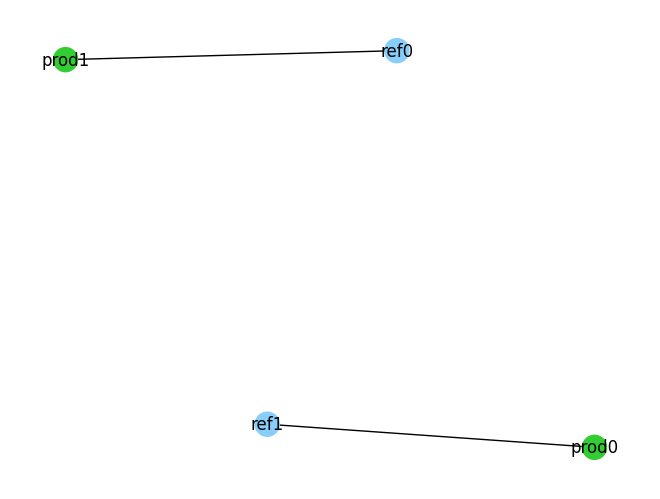

{0: [1], 1: [0]}
[np.float64(3.2265821996776527), np.float64(2.9316651074365643)] survived as [np.float64(3.2537822789616064), np.float64(2.8791019327110687)]
[np.float64(5.176871142556182), np.float64(6.949752477066356)] survived as [np.float64(5.314654809778389), np.float64(6.9122756011558275)]
Final macroclusters:
{'id': 0, 'center': [np.float64(5.314654809778389), np.float64(6.9122756011558275)], 'radius': np.float64(1.2387161722032436)}
{'id': 1, 'center': [np.float64(3.2537822789616064), np.float64(2.8791019327110687)], 'radius': np.float64(1.1357111171941598)}

-----------------------------------------------------------------------------------



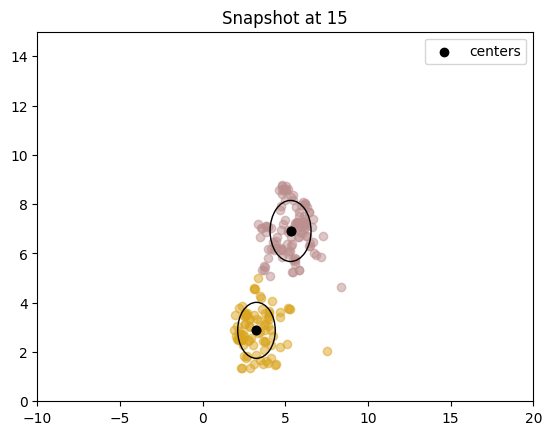

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 46 ----> Apply macroclustering <!>



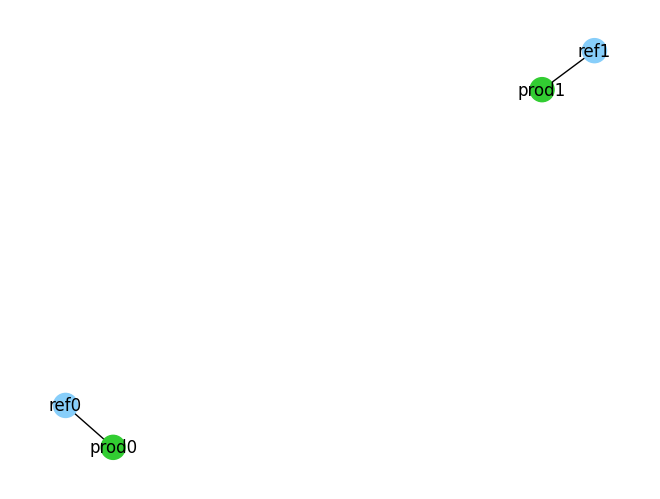

{0: [0], 1: [1]}
[np.float64(5.314654809778389), np.float64(6.9122756011558275)] survived as [np.float64(5.463121935909179), np.float64(6.761915312505065)]
[np.float64(3.2537822789616064), np.float64(2.8791019327110687)] survived as [np.float64(3.4508401712645664), np.float64(2.787563220962237)]
Final macroclusters:
{'id': 0, 'center': [np.float64(5.463121935909179), np.float64(6.761915312505065)], 'radius': np.float64(1.3707025690566226)}
{'id': 1, 'center': [np.float64(3.4508401712645664), np.float64(2.787563220962237)], 'radius': np.float64(1.2056744437238307)}

-----------------------------------------------------------------------------------



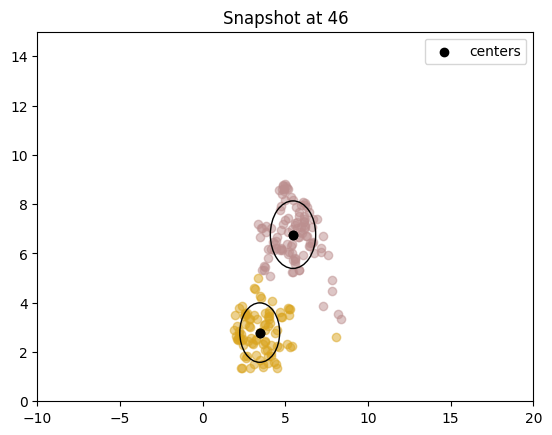

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 212 ----> Apply macroclustering <!>



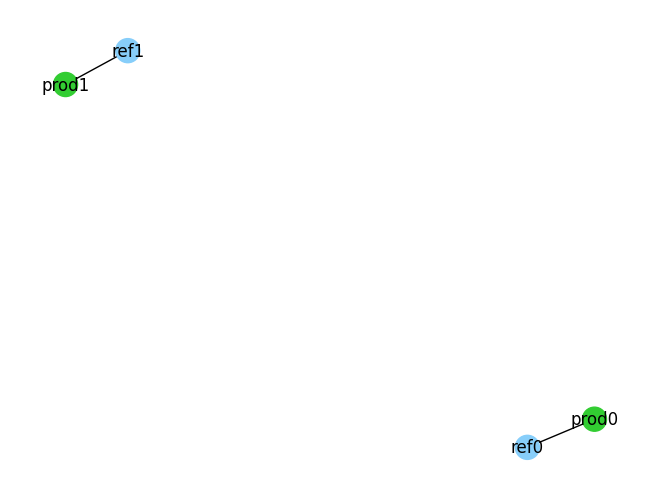

{0: [0], 1: [1]}
[np.float64(5.463121935909179), np.float64(6.761915312505065)] survived as [np.float64(6.060593537327387), np.float64(6.634649931573542)]
[np.float64(3.4508401712645664), np.float64(2.787563220962237)] survived as [np.float64(3.9701041976610822), np.float64(2.7540509504040855)]
Final macroclusters:
{'id': 0, 'center': [np.float64(6.060593537327387), np.float64(6.634649931573542)], 'radius': np.float64(1.4867998989144806)}
{'id': 1, 'center': [np.float64(3.9701041976610822), np.float64(2.7540509504040855)], 'radius': np.float64(1.3522536814030202)}

-----------------------------------------------------------------------------------



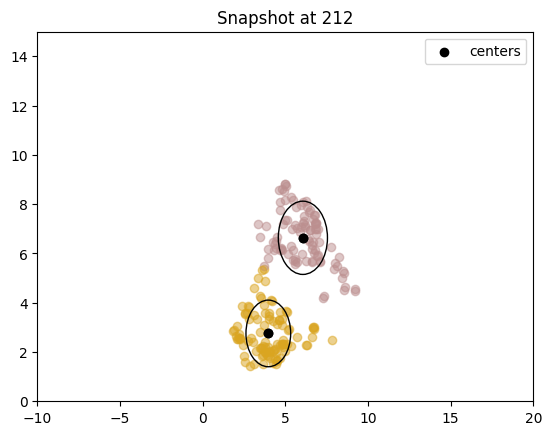

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 308 ----> Apply macroclustering <!>



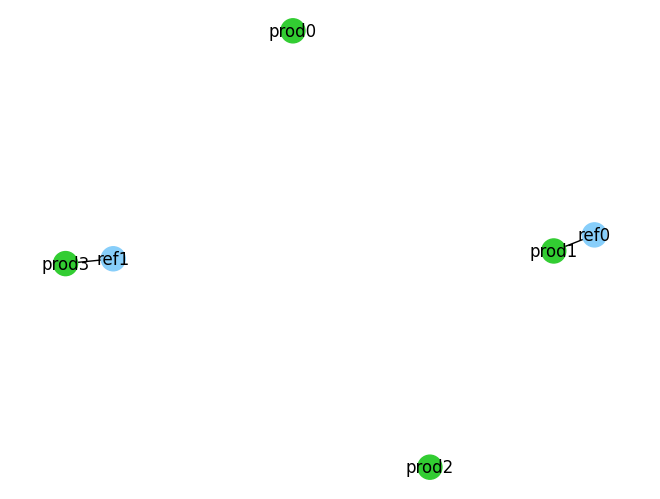

{0: [1], 1: [3]}
(!) [np.float64(8.318792369235211), np.float64(4.866590486237065)] appeared
[np.float64(6.060593537327387), np.float64(6.634649931573542)] survived as [np.float64(5.3321510048235865), np.float64(6.937946303416107)]
(!) [np.float64(6.6882952182523665), np.float64(2.441636864857006)] appeared
[np.float64(3.9701041976610822), np.float64(2.7540509504040855)] survived as [np.float64(3.1693418136862794), np.float64(2.8657218231711266)]
Final macroclusters:
{'id': 0, 'center': [np.float64(5.3321510048235865), np.float64(6.937946303416107)], 'radius': np.float64(1.2493356945973637)}
{'id': 1, 'center': [np.float64(3.1693418136862794), np.float64(2.8657218231711266)], 'radius': np.float64(1.1439309956684214)}
{'id': 2, 'center': [np.float64(8.318792369235211), np.float64(4.866590486237065)], 'radius': np.float64(0.9442996987982331)}
{'id': 3, 'center': [np.float64(6.6882952182523665), np.float64(2.441636864857006)], 'radius': np.float64(0.7181754264575394)}

-------------------

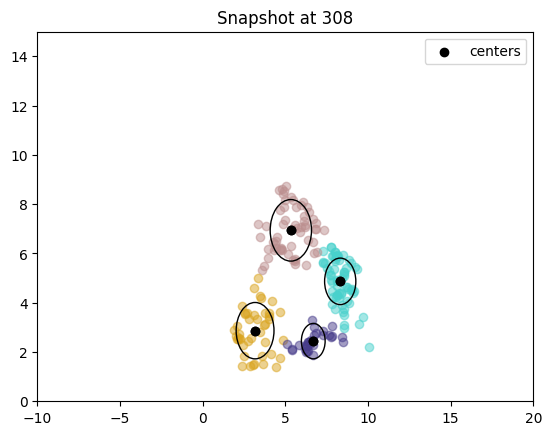

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 572 ----> Apply macroclustering <!>



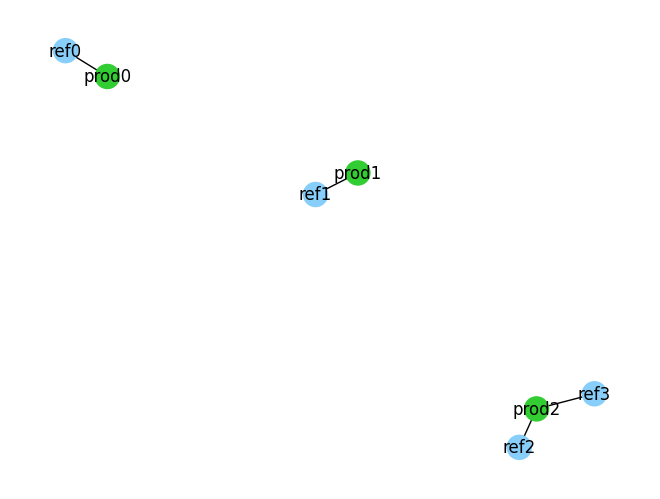

{0: [0], 1: [1], 2: [2], 3: [2]}
[np.float64(5.3321510048235865), np.float64(6.937946303416107)] survived as [np.float64(5.334681973737828), np.float64(6.864137331644692)]
[np.float64(3.1693418136862794), np.float64(2.8657218231711266)] survived as [np.float64(3.1925670364323757), np.float64(3.1360880732536325)]
(!) [3] are merged in [np.float64(8.396846053773073), np.float64(3.5898527712061785)]
Final macroclusters:
{'id': 0, 'center': [np.float64(5.334681973737828), np.float64(6.864137331644692)], 'radius': np.float64(1.2175833385976191)}
{'id': 1, 'center': [np.float64(3.1925670364323757), np.float64(3.1360880732536325)], 'radius': np.float64(1.1590807175400395)}
{'id': 4, 'center': [np.float64(8.396846053773073), np.float64(3.5898527712061785)], 'radius': np.float64(1.4565486386685123)}

-----------------------------------------------------------------------------------



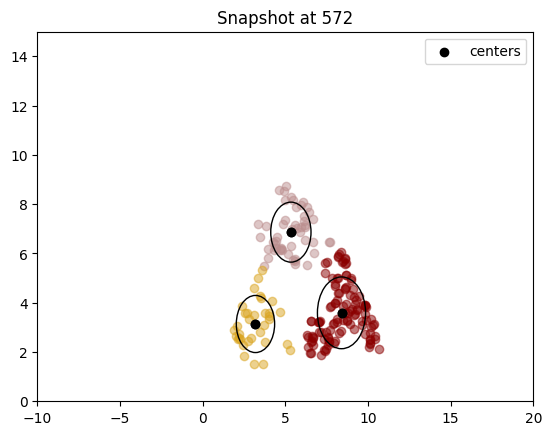

<Figure size 1000x1000 with 0 Axes>

Batch Finished ----> Apply macroclustering



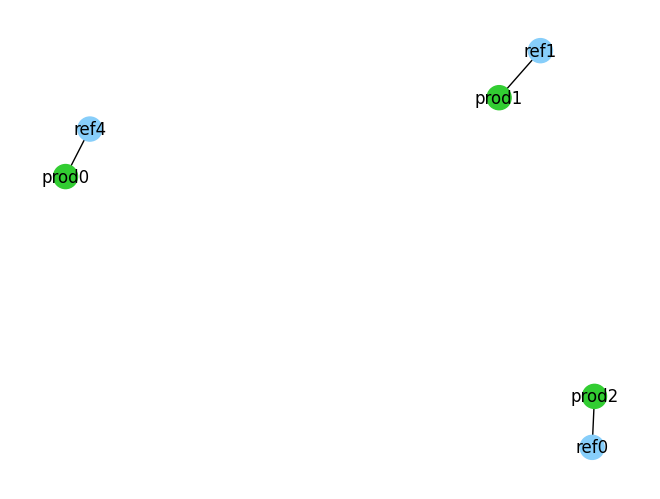

{0: [2], 1: [1], 4: [0]}
[np.float64(8.396846053773073), np.float64(3.5898527712061785)] survived as [np.float64(9.178004717826848), np.float64(3.3764256185955457)]
[np.float64(3.1925670364323757), np.float64(3.1360880732536325)] survived as [np.float64(3.140191208571199), np.float64(3.0654642134904875)]
[np.float64(5.334681973737828), np.float64(6.864137331644692)] survived as [np.float64(5.164219121138258), np.float64(6.883176952600477)]
Final macroclusters:
{'id': 0, 'center': [np.float64(5.164219121138258), np.float64(6.883176952600477)], 'radius': np.float64(1.1885538951185055)}
{'id': 1, 'center': [np.float64(3.140191208571199), np.float64(3.0654642134904875)], 'radius': np.float64(1.1029589761531216)}
{'id': 4, 'center': [np.float64(9.178004717826848), np.float64(3.3764256185955457)], 'radius': np.float64(1.207647499797909)}

-----------------------------------------------------------------------------------



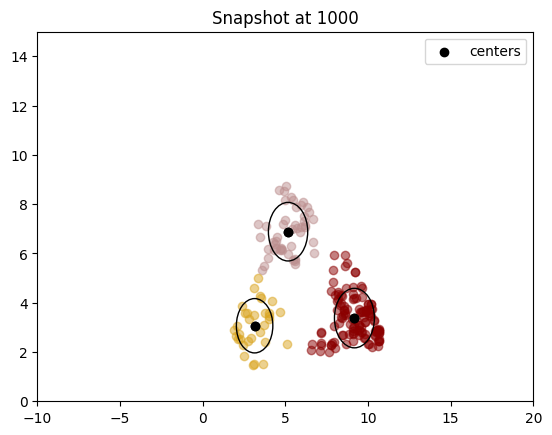

<Figure size 1000x1000 with 0 Axes>

In [212]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(plot_img=True, print_graph=True, macroclustering_at_end=True)

#clustream.draw_snapshots()
clustream.draw_gif(title="brightness")

In [213]:
# Clean directory

for id in ids:
    ids.remove(id)
    clean_directory(f"./plots/{id}")
    print(f"Deleted {id}")


Directory './plots/76435' and its contents removed successfully.
Deleted 76435
